# 대한민국 19대 대통령 선거 데이터 분석

In [93]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib 
matplotlib.font_manager._rebuild()
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

In [72]:
df = pd.read_excel("19daeseon.xlsx")

In [6]:
df.head()

,시도명,구시군명,읍면동명,투표구명,선거인수,투표수,더불어민주당\n문재인,자유한국당\n홍준표,국민의당\n안철수,바른정당\n유승민,...,경제애국당\n오영국,국민대통합당\n장성민,늘푸른한국당\n이재오,민중연합당\n김선동,한국국민당\n이경희,홍익당\n윤홍식,무소속\n김민찬,계,무효투표수,기권수
0,전국,NaN,NaN,NaN,42479710,32807908,13423800,7852849,6998342,2208771,...,6040,21709,9140,27229,11355,18543,33990,32672175,135733,9671802
1,서울특별시,합계,NaN,NaN,8382999,6590646,2781345,1365285,1492767,476973,...,789,3554,1938,3416,1277,2177,3950,6568917,21729,1792353
2,서울특별시,종로구,합계,NaN,133769,102566,42512,22325,22313,7412,...,5,78,31,63,26,47,49,102202,364,31203
3,서울특별시,종로구,거소·선상투표,NaN,218,206,64,42,65,8,...,1,3,1,0,0,0,2,201,5,12
4,서울특별시,종로구,관외사전투표,NaN,12803,12803,5842,2025,2509,1156,...,0,4,2,15,6,9,6,12736,67,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22214 entries, 0 to 22213
Data columns (total 22 columns):
시도명           22214 non-null object
구시군명          22213 non-null object
읍면동명          22196 non-null object
투표구명          20946 non-null object
선거인수          22214 non-null int64
투표수           22214 non-null int64
더불어민주당
문재인    22214 non-null int64
자유한국당
홍준표     22214 non-null int64
국민의당
안철수      22214 non-null int64
바른정당
유승민      22214 non-null int64
정의당
심상정       22214 non-null int64
새누리당
조원진      22214 non-null int64
경제애국당
오영국     22214 non-null int64
국민대통합당
장성민    22214 non-null int64
늘푸른한국당
이재오    22214 non-null int64
민중연합당
김선동     22214 non-null int64
한국국민당
이경희     22214 non-null int64
홍익당
윤홍식       22214 non-null int64
무소속
김민찬       22214 non-null int64
계             22214 non-null int64
무효투표수         22214 non-null int64
기권수           22214 non-null int64
dtypes: int64(18), object(4)
memory usage: 3.7+ MB


In [81]:
provincedf = df[df['구시군명'] == '합계'].drop(["읍면동명", "투표구명","선거인수","투표수","계","무효투표수","기권수"], 1).reset_index().drop(['index','구시군명'],1).set_index('시도명')
provincedf

,더불어민주당\n문재인,자유한국당\n홍준표,국민의당\n안철수,바른정당\n유승민,정의당\n심상정,새누리당\n조원진,경제애국당\n오영국,국민대통합당\n장성민,늘푸른한국당\n이재오,민중연합당\n김선동,한국국민당\n이경희,홍익당\n윤홍식,무소속\n김민찬
시도명,,,,,,,,,,,,,
서울특별시,2781345,1365285,1492767,476973,425459,9987,789,3554,1938,3416,1277,2177,3950
부산광역시,872127,720484,378907,162480,109329,2651,276,1316,465,981,496,1041,2156
대구광역시,342620,714205,235757,198459,74440,4057,259,563,324,804,401,986,1501
인천광역시,747090,379191,428888,118691,129925,2646,374,1618,410,1230,594,625,1681
광주광역시,583847,14882,287222,20862,43719,152,111,655,103,2265,136,264,614
대전광역시,404545,191376,218769,59820,63669,1069,168,620,234,611,256,406,758
울산광역시,282794,203602,128520,60289,62187,829,128,575,240,641,220,411,926
세종특별자치시,77767,23211,32010,9192,9353,153,34,88,42,126,50,76,135
경기도,3319812,1637345,1807308,540023,546373,10778,1302,5058,1858,6139,2213,2883,6553


C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0, flags=flags)


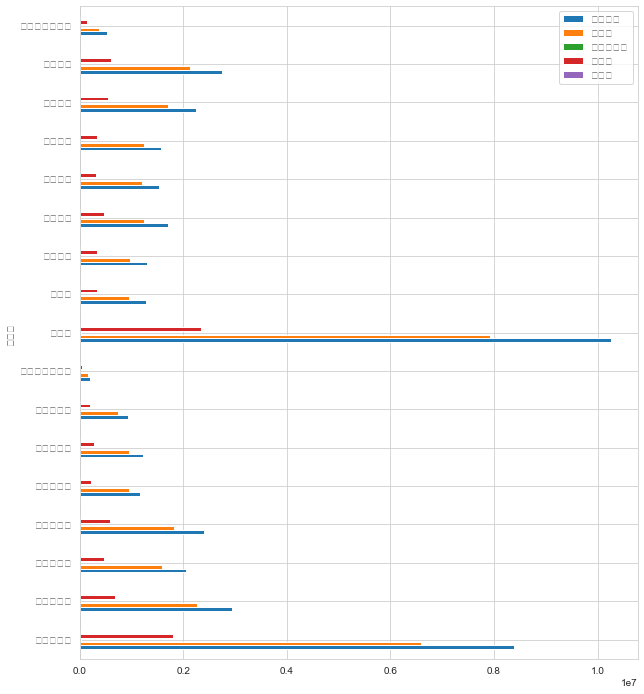

In [117]:
provincedf.plot(kind='barh',figsize=(10,12))

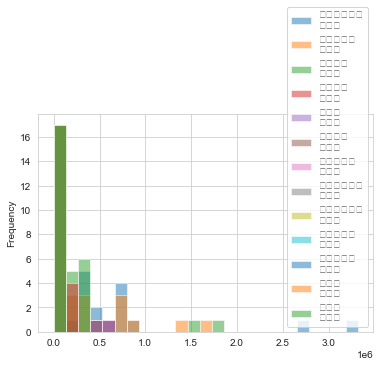

In [94]:
provincedf.plot.hist(bins=25, alpha=0.5)

In [86]:
influential=provincedf.T.head(5).T
influential

,더불어민주당\n문재인,자유한국당\n홍준표,국민의당\n안철수,바른정당\n유승민,정의당\n심상정
시도명,,,,,
서울특별시,2781345,1365285,1492767,476973,425459
부산광역시,872127,720484,378907,162480,109329
대구광역시,342620,714205,235757,198459,74440
인천광역시,747090,379191,428888,118691,129925
광주광역시,583847,14882,287222,20862,43719
대전광역시,404545,191376,218769,59820,63669
울산광역시,282794,203602,128520,60289,62187
세종특별자치시,77767,23211,32010,9192,9353
경기도,3319812,1637345,1807308,540023,546373


C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-

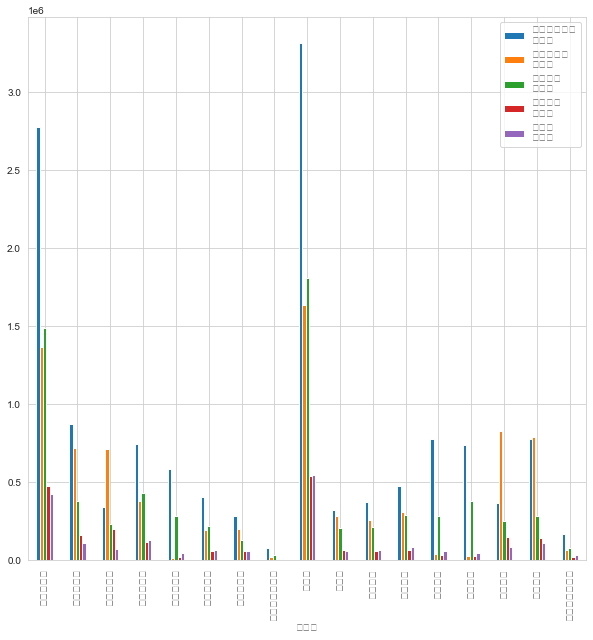

In [98]:
influential.plot.bar(figsize=(10,10))

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48520 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48124 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-

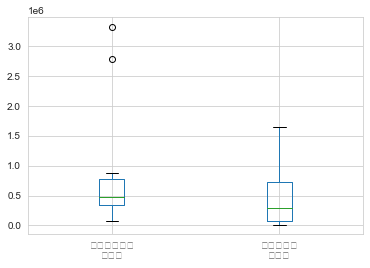

In [96]:
influential[['더불어민주당\n문재인','자유한국당\n홍준표']].plot.box()

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48520 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48124 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-

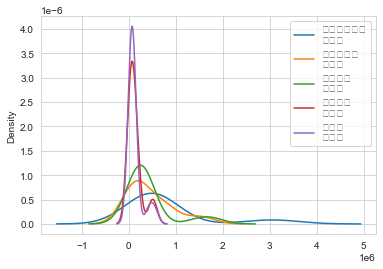

In [104]:
influential.plot.kde()

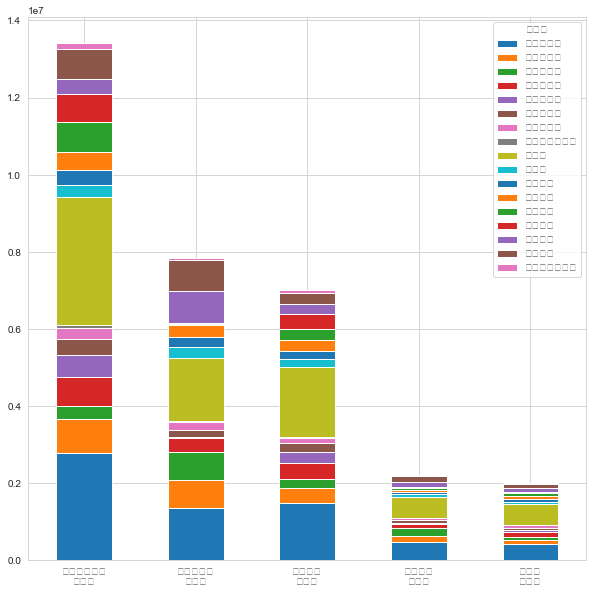

In [99]:
province=provincedf.T.head()
province.plot.bar(rot=0,figsize=(10,10),stacked=True)

In [101]:
provincedf = df[df['구시군명'] == '합계'].drop(["읍면동명", "투표구명","계","더불어민주당\n문재인","자유한국당\n홍준표","국민의당\n안철수","바른정당\n유승민","정의당\n심상정","새누리당\n조원진","경제애국당\n오영국","국민대통합당\n장성민","늘푸른한국당\n이재오","민중연합당\n김선동","한국국민당\n이경희","홍익당\n윤홍식","무소속\n김민찬"], 1).reset_index().drop(['index','구시군명'],1).set_index('시도명')
provincedf

,선거인수,투표수,무효투표수,기권수
시도명,,,,
서울특별시,8382999,6590646,21729,1792353
부산광역시,2950224,2261633,8924,688591
대구광역시,2043276,1581347,6971,461929
인천광역시,2409031,1820091,7128,588940
광주광역시,1166901,957321,2489,209580
대전광역시,1220602,945897,3596,274705
울산광역시,941093,744960,3598,196133
세종특별자치시,189421,152801,564,36620
경기도,10262309,7916009,28364,2346300


In [132]:
provincedf['투표율']=(provincedf.투표수/provincedf.선거인수)*100
provincedf['투표율']

시도명
서울특별시      78.619191
부산광역시      76.659704
대구광역시      77.392726
인천광역시      75.552826
광주광역시      82.039607
대전광역시      77.494302
울산광역시      79.159020
세종특별자치시    80.667402
경기도        77.136724
강원도        74.262356
충청북도       74.821660
충청남도       72.445546
전라북도       79.036015
전라남도       78.758143
경상북도       76.072852
경상남도       77.790182
제주특별자치도    72.289382
Name: 투표율, dtype: float64

In [145]:
provincedf['투표율'].head(5)

시도명
서울특별시    78.619191
부산광역시    76.659704
대구광역시    77.392726
인천광역시    75.552826
광주광역시    82.039607
Name: 투표율, dtype: float64

(0.0, 100.0)

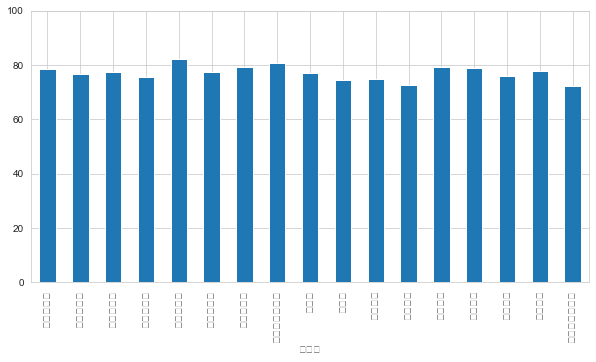

In [119]:
provincedf['투표율'].plot.bar(figsize=(10,5))
plt.ylim(0,100)